In [1]:
import sys, os

sys.path.append("/cr/users/filip/bin/")

# from utils.Auger.SD import Monitoring

from utils.binaries import *
from utils.plotting import *


def is_winter_night(df):
    mask = []
    for _, row in df.iterrows():
        t = row["t"]

        if t.month not in [6, 7]:
            mask.append(False)
            continue
        if not (0 <= t.hour < 6):
            mask.append(False)
            continue

        mask.append(True)

    return mask


def is_summer_day(df):
    mask = []
    for _, row in df.iterrows():
        t = row["t"]

        if t.month not in [1, 12]:
            mask.append(False)
            continue
        if not (12 <= t.hour < 18):
            mask.append(False)
            continue

        mask.append(True)

    return mask

11:39:25 [INFO] utils          -- (  +734ms) -- import logging
11:39:25 [INFO] utils.binaries -- (  +141ms) -- import numpy as np
11:39:25 [INFO] utils.binaries -- (    +7ms) -- import uncertainties
11:39:25 [INFO] utils.binaries -- (  +214ms) -- import pandas as pd
11:39:25 [INFO] utils.binaries -- (    +2ms) -- import binaries.tools as tools
11:39:26 [INFO] utils.plotting -- (  +600ms) -- import matplotlib.pyplot as plt
11:39:26 [INFO] utils.plotting -- (  +293ms) -- import seaborn as so
11:39:26 [DBUG] utils.plotting -- (    +5ms) -- font size set to 9.5
11:39:26 [DBUG] utils.plotting -- (    +1ms) -- label size set to 13.0
11:39:26 [DBUG] utils.plotting -- (    +0ms) -- figure size set to [6.6, 3.3]
11:39:26 [DBUG] utils.plotting -- (    +1ms) -- markersize set to 2.0
11:39:26 [DBUG] utils.plotting -- (    +0ms) -- usetex set to False
11:39:26 [INFO] utils.plotting -- (    +1ms) -- import plotting.tools as plot


In [2]:
import datetime

GPS_OFFSET = 315964800
data = pd.read_csv(
    "/cr/tempdata01/filip/SSDCalib/BootstrapHistos/estimates.txt",
    sep=" ",
    index_col=False,
)
data = data.dropna()

data["id"] = data["id"].astype(str)
data["t"] = [datetime.datetime.fromtimestamp(d + GPS_OFFSET) for d in data["t"]]

data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.dropna()

stations = np.unique(data["id"])

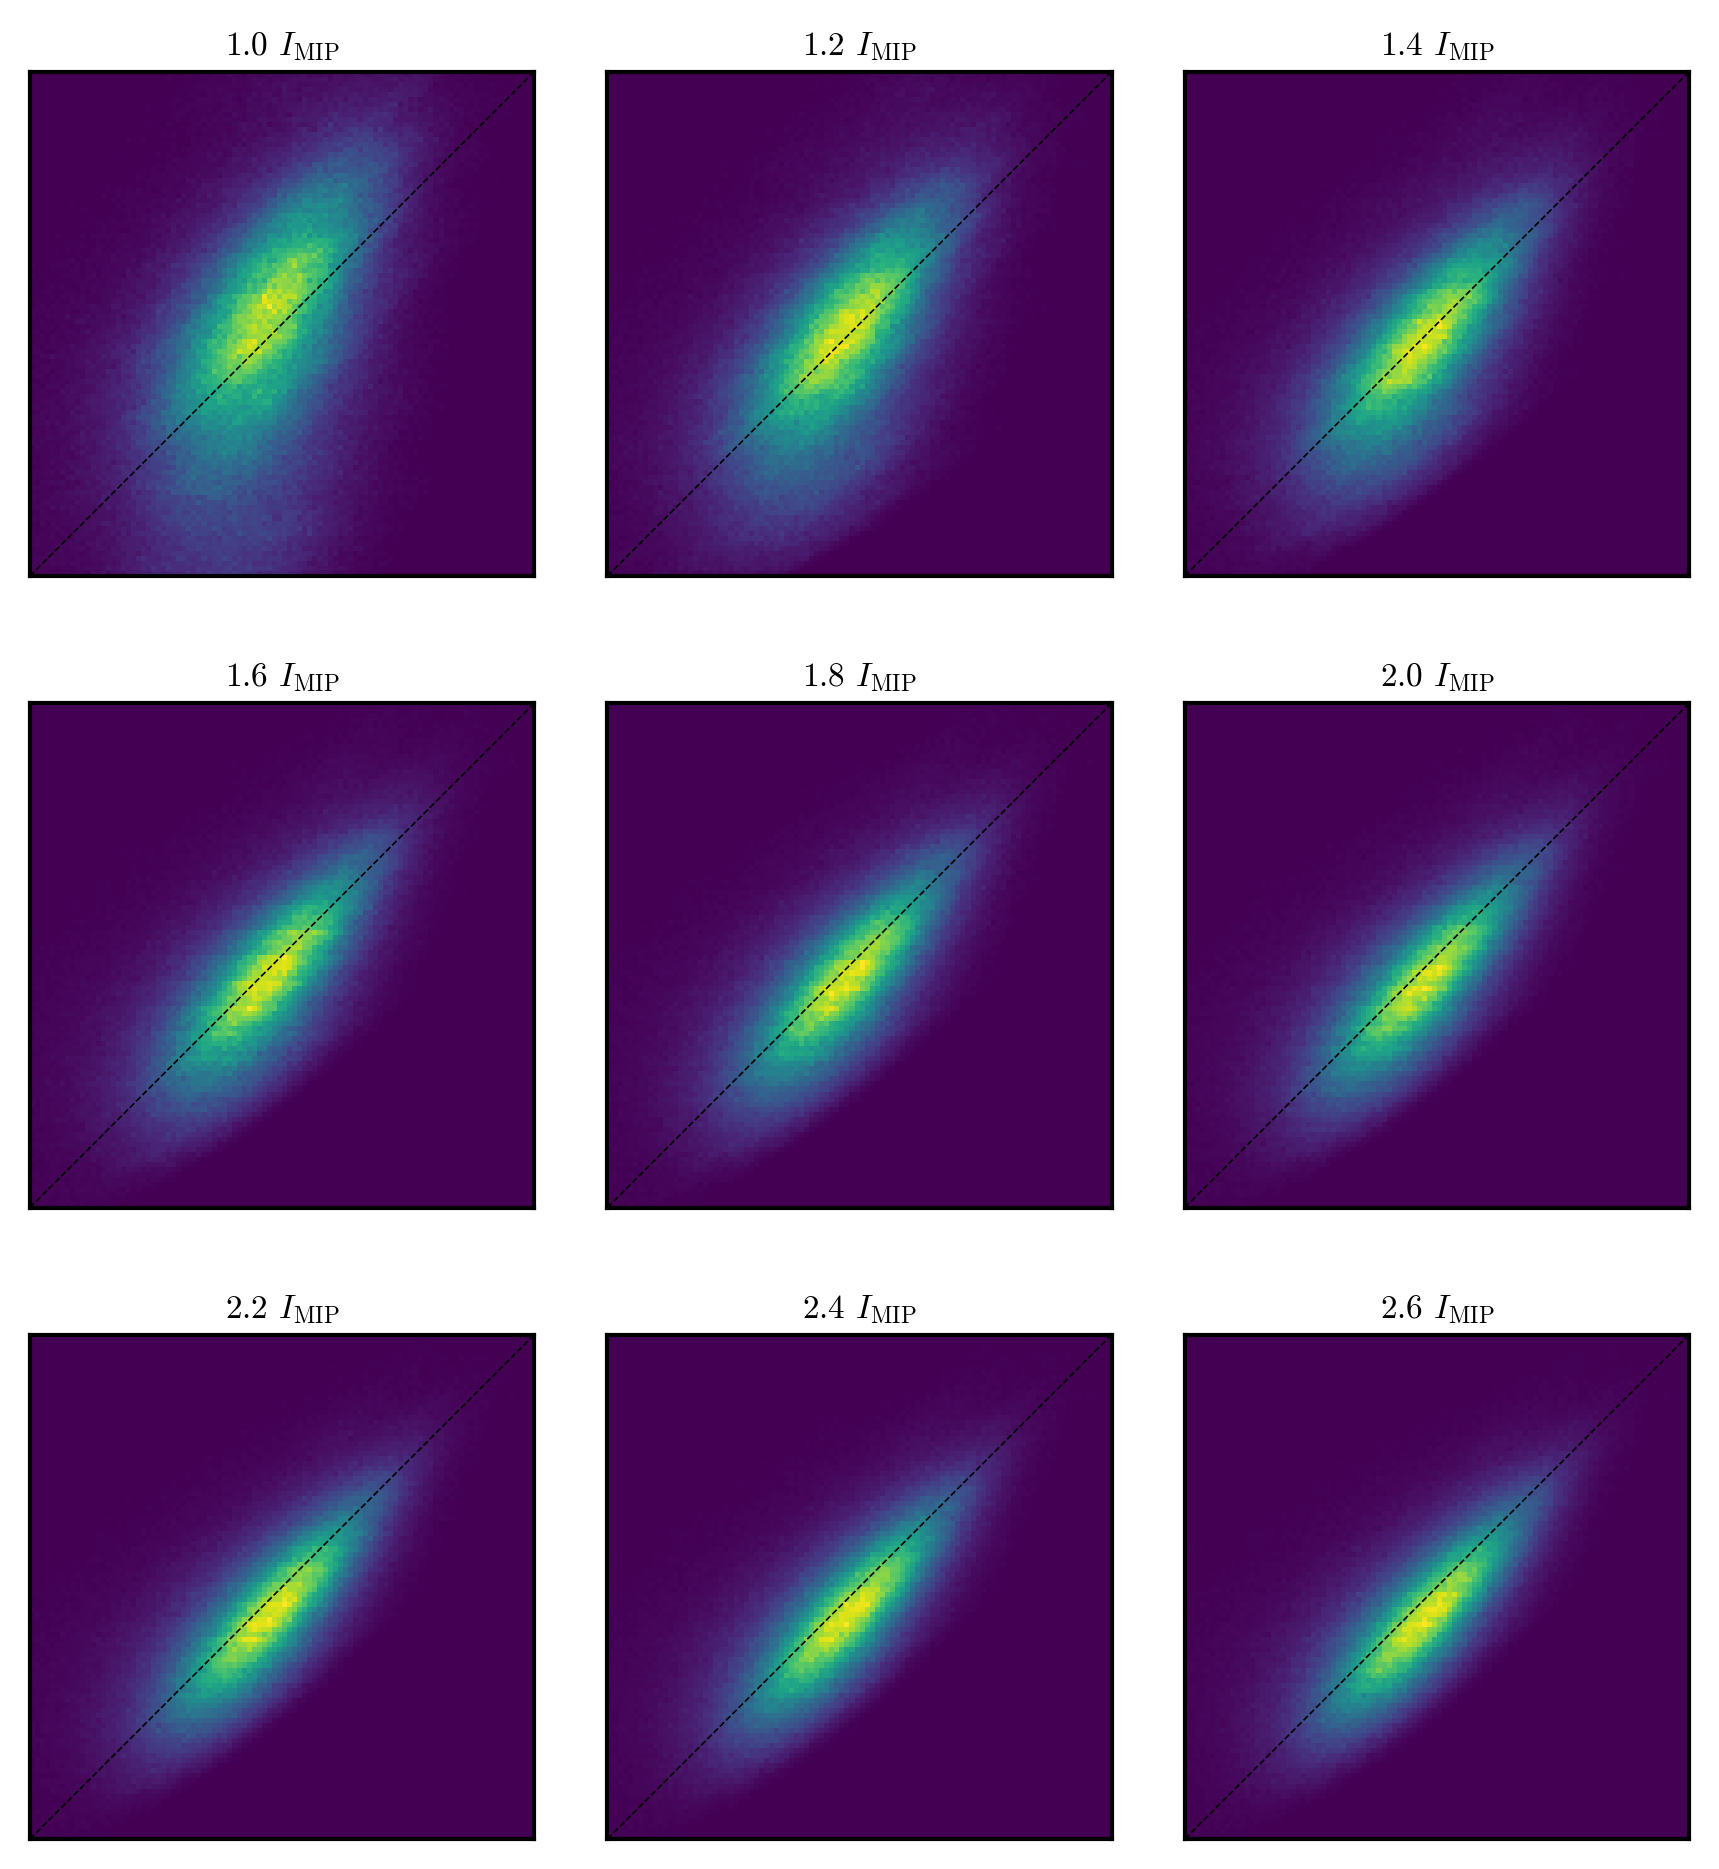

In [21]:
fig, axes = plt.subplots(3, 3, sharex=True, sharey=True)
axes = [ax for xs in axes for ax in xs]

xmin, xmax = data["mip"].min(), data["mip"].max()
axes[0].set_xlim(xmin, xmax)

for ax, col in zip(axes, data.columns[3::4]):
    ymin, ymax = data[col].min(), data[col].max()
    ax.set_ylim(ymin, ymax)
    ax.set_box_aspect(1)
    ax.set_title(
        col.replace("x", " ").replace("mip", "$I_\mathrm{MIP}$"),
        fontdict={"fontsize": 4},
        pad=2,
    )

    _ = ax.hist2d(data["mip"], data[col], bins=100, range=[[30, 55], [30, 55]])
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", lw=0.2, c="k")
    ax.set_xticks([]), ax.set_yticks([])

plt.subplots_adjust(wspace=-0.9, hspace=0.3)
plt.tight_layout()